## SEP 740 Project Report 1

##Abstraction

Nowadays, with the growth of technology and management techniques, each company requires a more precise requirement for the specialist they are hiring. Besides the mandatory professional knowledge, knowing one's personality is also very important. As a team leader, one's personality can tell you how your team members prefer to work and whom they collaborate with to result in a more effective outcome.

The MBTI (Myers Briggs Type Indicator) test is one of the self-report personality tests that is designed to identify a person's personality type, strengths, and preferences. This questionnaire was developed by Isabel Myers and get widely used by all kinds of employers around the world.

In this project, our task is to predict the category of personality in the MBTI test based on a given sentence or statement. We need to explore and compare various ways of data preprocessing and training methods. In the end, we will use the natural language processing-based model to predict the personality type in the MBTI system and use it in other scenarios or to solve some real-world problems.



#Dataset description
The dataset consists of two columns which are 'type' and 'posts'. 'type' describes the personality of a person, and 'posts' is a text list that contains the last 50 posts posted by the person. There are 8675 'posts' in total, and INFP is the personality type that has the highest frequency, with 1832 'posts'. INFJ is the second personality type ranked by frequency with 1470 'posts'. All personalities have at least 1 'posts'. We see mostly all the lengthy comments/posts contain roughly 6500 - 9000 words based on the density plot of the posts column. 

##Task description

Project 2 MBTI Personality Prediction is a sentiment classification task for label column "type." Each row of label column represents one combination of four different aspects of human personality according to the Myers Briggs Type Indicator (or MBTI for short) system (Mitchell J, 2017). MBTI is a personality type system that divides everyone into 16 distinct personality types across four-axis:

Introversion (I) – Extroversion (E)

Intuition (N)        – Sensing (S)

Thinking (T)        – Feeling (F)

Judging (J)          – Perceiving (P)

The general sentiment analysis approach uses natural language processing, text analysis, and computational linguistics to systematically identify, extract, quantify, and study affective states and subjective information (wiki,2022). Generally, it identifies the opinions in text data and assigns them a label for the specific task by syntactic and semantic analysis. For instance, this project has 16 types of labels that represent 16 MBTI personalities.  

We first import the correct dataset from the given source to solve a classification task, then visualize it for easier use. Based on the data visualization, we could implement specific data preprocessing techniques for the MBTI dataset. In order to implement machine learning models onto the dataset, we must vectorize the text dataset, also known as text data feature extraction. With features extracted from the dataset, we could apply the models on the training dataset and testing dataset to check the accuracy and find the best machine model for this task.

In detail describing our approach to this sentiment classification task, we choose to import the dataset from Github instead of Kaggle so that we could avoid the step of uploading the dataset file each day we first open the Colab notebook. After adding data visualization, we looked at the label column distribution since there are 16 distinct personality combinations. It is not very easy that might not be friendly to machine learning models like the Support Vector Machine algorithm. 

The given feature column "posts" is simple but contains 50 posts' contents separated by a "|||" sign. Most posts have URL links that do not help model training, so we have to replace those links and symbols before normalizing and lemmatizing the text. It's syntactic analysis for the text dataset. 

We choose the TF-IDF for vectorizing texts since it calculates two things term frequency and inverse document frequency. Term frequency= number of times the word appears in the sample. Moreover, IDF = log ( number of times the word appears in the sample/number of times the word appears in the whole document). (Yassine,2019) TF-IDF values the weight of each word proportional to its frequency in the sample documents and inversely proportional to its frequency in the whole documents. Therefore, the model could understand the more important words and less important words comparing using count vectorization. During the TF-IDF approach,  we restrict the maximum number of features to implement traditional machine models. After encoding the label column, the dataset is ready for model training. And this is the semantic analysis for text dataset.

Machine learning models we picked are Support Vector Classification, Logistic Regression, and Decision Tree.


Reference List:
1. Mitchell J. (2017, September 22). (MBTI) myers-briggs personality type dataset Kaggle. Retrieved October 10, 2022, from https://www.kaggle.com/datasets datasnaek/mbti-type
2. XenZenPez. (2006, August 13). Sentiment analysis. Wikipedia. Retrieved October 12, 2022, from https://en.wikipedia.org/wiki/Sentiment_analysis 
3. Hamdaoui, Y. (2019, March 24). TF(Term frequency)-idf(inverse document frequency) from scratch in python&nbsp;. Medium. Retrieved October 12, 2022, from https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558 







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import time

In [ ]:
url = 'https://raw.githubusercontent.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset/master/mbti_1.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.describe(include='all')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
# checking the types of varibles in the dataset(int,float,object) and also looking at null values
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
type,object,16,0,0.000000
posts,object,8675,0,0.000000


In [ ]:
I = 0; N = 0
T = 0; J = 0
type_list = []
for t in df.type:   
  if t[0] == 'I': I = 1
  elif t[0] == 'E': I = 0
  else: print('I-E not found') 
        
  if t[1] == 'N': N = 1
  elif t[1] == 'S': N = 0
  else: print('N-S not found')
        
  if t[2] == 'T': T = 1
  elif t[2] == 'F': T = 0
  else: print('T-F not found')
        
  if t[3] == 'J': J = 1
  elif t[3] == 'P': J = 0
  else: print('J-P not found')
  type_list.append([I,N,T,J])

type_df=pd.DataFrame(type_list, columns=('I/E', 'N/S', 'T/F','J/P'))


In [ ]:
type_df

,I/E,N/S,T/F,J/P
0,1,1,0,1
1,0,1,1,0
2,1,1,1,0
3,1,1,1,1
4,0,1,1,1
...,...,...,...,...
8670,1,0,0,0
8671,0,1,0,0
8672,1,1,1,0
8673,1,1,0,0


Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434




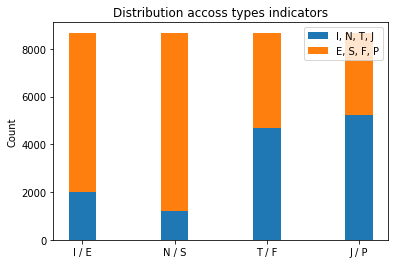

In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", type_df['I/E'].value_counts()[0], " / ", type_df['I/E'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", type_df['N/S'].value_counts()[0], " / ", type_df['N/S'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", type_df['T/F'].value_counts()[0], " / ", type_df['T/F'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", type_df['J/P'].value_counts()[0], " / ", type_df['J/P'].value_counts()[1])
print()
print()

#Plotting the distribution
N = 4 #4 broad classifications

#count when the chars are 0 - indicating extroversion 
bottom = (type_df['I/E'].value_counts()[0], type_df['N/S'].value_counts()[0], type_df['T/F'].value_counts()[0], type_df['J/P'].value_counts()[0])
#count when the chars are 1 - indicating intoversion
top = (type_df['I/E'].value_counts()[1], type_df['N/S'].value_counts()[1], type_df['T/F'].value_counts()[1], type_df['J/P'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.3           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, J")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

In [ ]:
x

I/E    1
N/S    1
T/F    0
J/P    0
dtype: int64

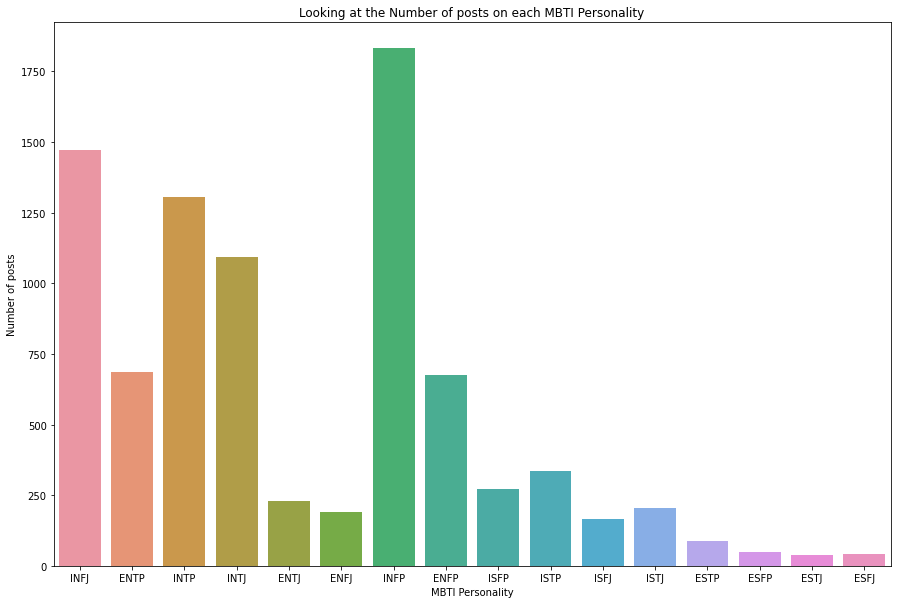

In [ ]:
plt.figure(figsize=(15,10))

sns.countplot(x=df['type'])
plt.ylabel('Number of posts')
plt.xlabel('MBTI Personality')
plt.title('Looking at the Number of posts on each MBTI Personality')


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

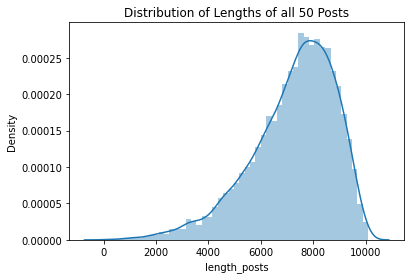

In [ ]:
#Density Plot - Word Count by Posts => gives an overall picture of kernel density estimation

df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
len(df.posts[0].split('|||'))

50

In [ ]:
for i in df.posts[0].split('|||'):
  print(i)

'http://www.youtube.com/watch?v=qsXHcwe3krw
http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks
What has been the most life-changing experience in your life?
http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.
May the PerC Experience immerse you.
The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206
Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...
84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...
Welcome and stuf

In [ ]:
import re
import nltk.corpus
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Clean dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# normalize, remove stop words and url links.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
clean_text1=[]
for i in df.posts[0].split('|||'):
  i=i.lower()
  i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
  i_tokens = word_tokenize(i)
  filtered_i = [w for w in i_tokens if not w in stop_words]
  clean_text1.append(filtered_i)
  print(filtered_i)


[]
[]
['enfp', 'intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranks']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative']
['basically', 'come', 'three', 'items', 'youve', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left']
['things', 'moderation', 'sims', 'indeed', 'video', 'game', '

In [ ]:
#lemmatization ensure that only words that mean similar things are consolidated into a single token
for j in clean_text1:
  for p in range(len(j)):
    j[p]=lemmatizer.lemmatize(j[p])
  print(j) 

[]
[]
['enfp', 'intj', 'moment', 'sportscenter', 'top', 'ten', 'play', 'prank']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'time', 'time', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minute', 'moving', 'leg', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edible', 'healthier', 'alternative']
['basically', 'come', 'three', 'item', 'youve', 'determined', 'type', 'whichever', 'type', 'want', 'would', 'likely', 'use', 'given', 'type', 'cognitive', 'function', 'whatnot', 'left']
['thing', 'moderation', 'sims', 'indeed', 'video', 'game', 'good', 'one',

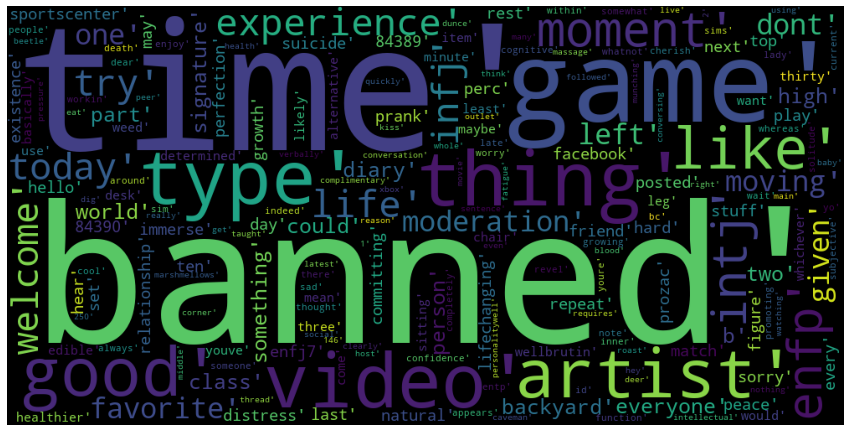

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(' ').join(str(v) for v in clean_text1)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Clean methods for dataframe cleaning
def clean_data(str):
  clean_text1=[]
  for i in str.split('|||'):
    i=i.lower()
    i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
    i_tokens = word_tokenize(i)
    filtered_i = [w for w in i_tokens if not w in stop_words]
    clean_text1.append(filtered_i)
  return clean_text1

def lemmatized_data(strList):
  for j in strList:
    for p in range(len(j)):
      j[p]=lemmatizer.lemmatize(j[p])
  return strList

In [ ]:
# Take 1 min to combine
final_list=[]
for i in range(len(df.posts)):
  x=clean_data(df.posts[i])
  y=lemmatized_data(x)
  final_list.append(y)

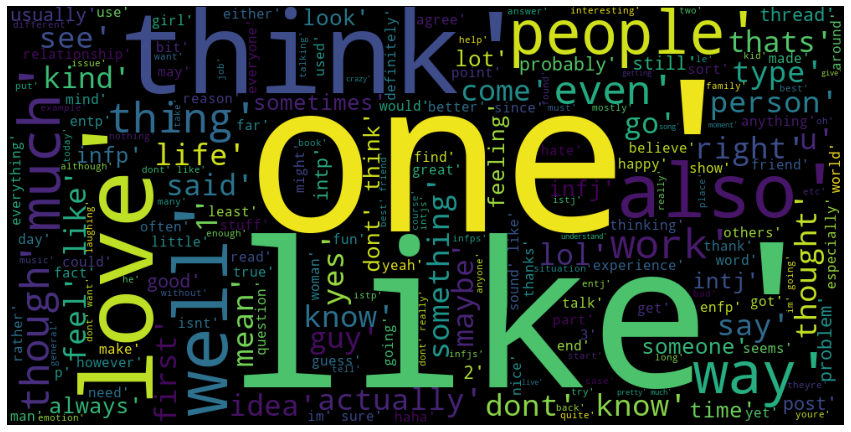

In [ ]:
#convert list to string and generate final word cloud for the cleaned posts.
unique_string2=(' ').join(str(v) for v in final_list)
wordcloud2 = WordCloud(width = 1000, height = 500).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')

data_length=[]
lemmatizer=WordNetLemmatizer()
clean_text1=[]
for i in range(0,len(df.posts)):
  doc = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df.posts[i])
  doc = doc.lower()
  doc = doc.split()
  doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
  doc = ' '.join(doc)
  clean_text1.append(doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,type,posts,length_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652
1,ENTP,'I'm finding the lack of me in these posts ver...,7053
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271
4,ENTJ,'You're fired.|||That's another silly misconce...,6111
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011
8671,ENFP,'So...if this thread already exists someplace ...,7902
8672,INTP,'So many questions when i do these things. I ...,5772
8673,INFP,'I am very conflicted right now when it comes ...,9479


In [ ]:
# Find the original posts column
n = df.columns[1]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put cleaned posts in place
df[n] = clean_text1

In [ ]:
df

,type,length_posts,posts
0,INFJ,4652,intj moment sportscenter top ten play prankswh...
1,ENTP,7053,im finding lack post alarmingsex boring positi...
2,INTP,5265,good one course say know thats blessing cursed...
3,INTJ,6271,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,6111,youre firedthats another silly misconception a...
...,...,...,...
8670,ISFP,5011,always think cat fi doms reason website become...
8671,ENFP,7902,soif thread already exists someplace else heck...
8672,INTP,5772,many question thing would take purple pill pic...
8673,INFP,9479,conflicted right come wanting child honestly m...


----------------------------------------------------------- Training set 1  -------------------------------------------------------------------------
SVC Training:
train set result 
                precision    recall  f1-score   support

        ENFJ       0.98      0.80      0.88       132
        ENFP       0.97      0.95      0.96       465
        ENTJ       0.99      0.92      0.95       159
        ENTP       0.96      0.98      0.97       469
        ESFJ       0.00      0.00      0.00        15
        ESFP       1.00      0.26      0.41        35
        ESTJ       1.00      0.37      0.54        27
        ESTP       1.00      0.86      0.93        58
        INFJ       0.94      0.98      0.96       966
        INFP       0.92      0.99      0.95      1216
        INTJ       0.97      0.97      0.97       705
        INTP       0.95      0.98      0.96       879
        ISFJ       0.99      0.86      0.92       108
        ISFP       0.97      0.89      0.93       179
     

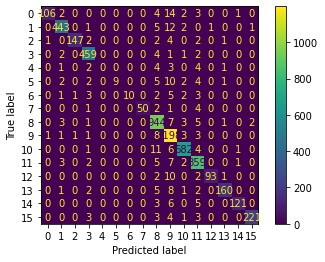

<Figure size 16000x16000 with 0 Axes>



CM for SVC test set:


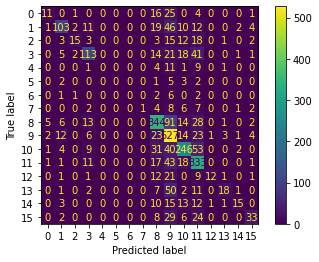

<Figure size 16000x16000 with 0 Axes>




Logistic Regression Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       0.82      0.11      0.19       132
        ENFP       0.81      0.65      0.72       465
        ENTJ       0.94      0.18      0.31       159
        ENTP       0.81      0.65      0.72       469
        ESFJ       0.00      0.00      0.00        15
        ESFP       0.00      0.00      0.00        35
        ESTJ       0.00      0.00      0.00        27
        ESTP       1.00      0.03      0.07        58
        INFJ       0.75      0.83      0.79       966
        INFP       0.63      0.94      0.75      1216
        INTJ       0.73      0.79      0.76       705
        INTP       0.68      0.89      0.77       879
        ISFJ       0.95      0.17      0.28       108
        ISFP       0.83      0.17      0.28       179
        ISTJ       0.69      0.07      0.12       135
        ISTP       0.91      0.43      0.58       235

    accuracy    

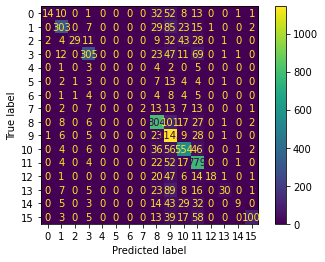

<Figure size 16000x16000 with 0 Axes>



CM for Logistic Regression test set:


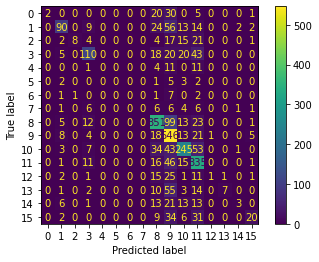

<Figure size 16000x16000 with 0 Axes>



\Decision Tree Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.66      0.76       132
        ENFP       0.92      0.87      0.89       465
        ENTJ       0.88      0.86      0.87       159
        ENTP       0.94      0.87      0.91       469
        ESFJ       0.67      0.67      0.67        15
        ESFP       0.83      0.54      0.66        35
        ESTJ       1.00      0.41      0.58        27
        ESTP       0.92      0.59      0.72        58
        INFJ       0.93      0.87      0.90       966
        INFP       0.68      0.97      0.80      1216
        INTJ       0.95      0.85      0.90       705
        INTP       0.94      0.85      0.89       879
        ISFJ       0.97      0.69      0.81       108
        ISFP       0.96      0.78      0.86       179
        ISTJ       0.74      0.63      0.68       135
        ISTP       0.96      0.80      0.88       235

    accuracy          

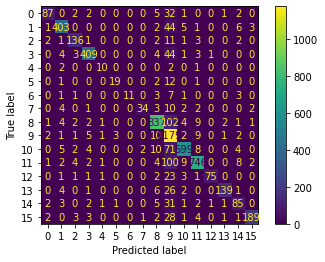

<Figure size 16000x16000 with 0 Axes>



CM for Decision Tree test set:


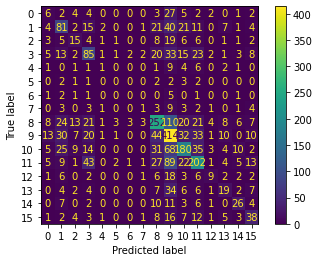

<Figure size 16000x16000 with 0 Axes>



----------------------------------------------------------- Training set 2  -------------------------------------------------------------------------
SVC Training:
train set result 
                precision    recall  f1-score   support

        ENFJ       0.96      0.82      0.88       122
        ENFP       0.96      0.94      0.95       431
        ENTJ       0.99      0.93      0.96       158
        ENTP       0.97      0.96      0.96       444
        ESFJ       1.00      0.63      0.77        35
        ESFP       1.00      0.16      0.28        31
        ESTJ       1.00      0.54      0.70        26
        ESTP       1.00      0.75      0.86        60
        INFJ       0.95      0.97      0.96       982
        INFP       0.93      0.99      0.95      1213
        INTJ       0.95      0.97      0.96       723
        INTP       0.94      0.98      0.96       888
        ISFJ       1.00      0.87      0.93       110
        ISFP       0.98      0.90      0.94       179
   

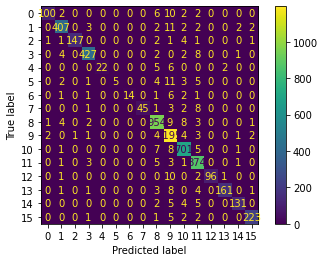

<Figure size 16000x16000 with 0 Axes>



CM for SVC test set:


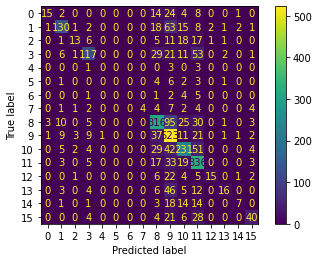

<Figure size 16000x16000 with 0 Axes>




Logistic Regression Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       0.85      0.09      0.16       122
        ENFP       0.82      0.59      0.69       431
        ENTJ       0.94      0.20      0.33       158
        ENTP       0.79      0.60      0.68       444
        ESFJ       0.00      0.00      0.00        35
        ESFP       0.00      0.00      0.00        31
        ESTJ       0.00      0.00      0.00        26
        ESTP       1.00      0.03      0.06        60
        INFJ       0.72      0.82      0.77       982
        INFP       0.62      0.94      0.75      1213
        INTJ       0.74      0.81      0.77       723
        INTP       0.68      0.88      0.77       888
        ISFJ       0.94      0.14      0.24       110
        ISFP       0.91      0.17      0.29       179
        ISTJ       0.77      0.16      0.27       147
        ISTP       0.87      0.44      0.58       234

    accuracy    

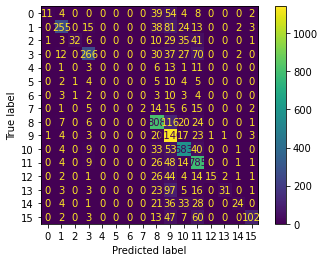

<Figure size 16000x16000 with 0 Axes>



CM for Logistic Regression test set:


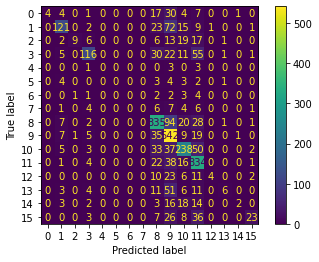

<Figure size 16000x16000 with 0 Axes>



\Decision Tree Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       0.95      0.75      0.84       122
        ENFP       0.98      0.83      0.90       431
        ENTJ       0.94      0.84      0.89       158
        ENTP       0.94      0.83      0.88       444
        ESFJ       0.81      0.49      0.61        35
        ESFP       0.88      0.45      0.60        31
        ESTJ       1.00      0.58      0.73        26
        ESTP       0.92      0.60      0.73        60
        INFJ       0.61      0.94      0.74       982
        INFP       0.90      0.90      0.90      1213
        INTJ       0.92      0.85      0.89       723
        INTP       0.94      0.83      0.88       888
        ISFJ       0.86      0.62      0.72       110
        ISFP       0.96      0.74      0.84       179
        ISTJ       0.99      0.69      0.82       147
        ISTP       0.96      0.83      0.89       234

    accuracy          

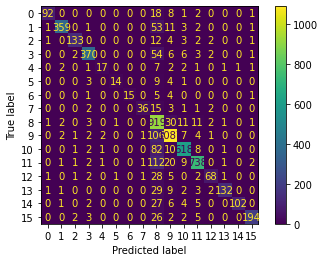

<Figure size 16000x16000 with 0 Axes>



CM for Decision Tree test set:


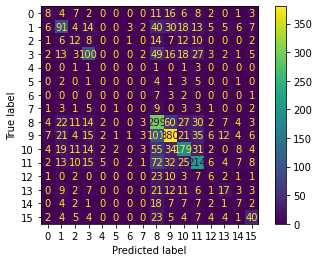

<Figure size 16000x16000 with 0 Axes>



----------------------------------------------------------- Training set 3  -------------------------------------------------------------------------
SVC Training:
train set result 
                precision    recall  f1-score   support

        ENFJ       0.97      0.84      0.90       126
        ENFP       0.96      0.95      0.95       454
        ENTJ       1.00      0.88      0.93       145
        ENTP       0.95      0.96      0.96       457
        ESFJ       1.00      0.65      0.79        34
        ESFP       1.00      0.27      0.42        30
        ESTJ       1.00      0.60      0.75        25
        ESTP       1.00      0.80      0.89        60
        INFJ       0.94      0.98      0.96       992
        INFP       0.93      0.99      0.96      1235
        INTJ       0.96      0.97      0.96       754
        INTP       0.95      0.98      0.96       841
        ISFJ       0.99      0.87      0.93       114
        ISFP       0.98      0.88      0.93       184
   

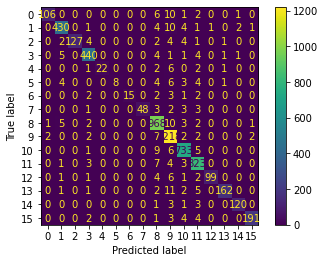

<Figure size 16000x16000 with 0 Axes>



CM for SVC test set:


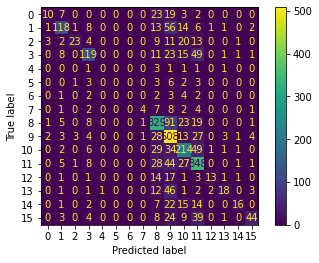

<Figure size 16000x16000 with 0 Axes>




Logistic Regression Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.10      0.17       126
        ENFP       0.80      0.59      0.68       454
        ENTJ       0.95      0.14      0.25       145
        ENTP       0.79      0.63      0.70       457
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        30
        ESTJ       0.00      0.00      0.00        25
        ESTP       0.00      0.00      0.00        60
        INFJ       0.71      0.81      0.76       992
        INFP       0.61      0.93      0.74      1235
        INTJ       0.72      0.81      0.76       754
        INTP       0.69      0.87      0.77       841
        ISFJ       0.90      0.16      0.27       114
        ISFP       0.86      0.13      0.23       184
        ISTJ       0.83      0.08      0.14       128
        ISTP       0.85      0.26      0.40       205

    accuracy    

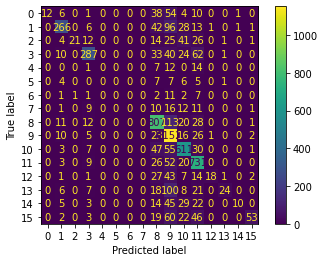

<Figure size 16000x16000 with 0 Axes>



CM for Logistic Regression test set:


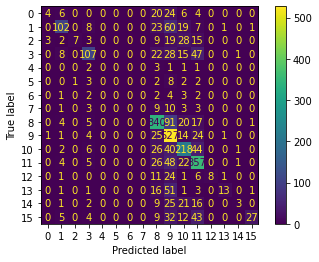

<Figure size 16000x16000 with 0 Axes>



\Decision Tree Training:
train classification report 
                precision    recall  f1-score   support

        ENFJ       0.85      0.62      0.72       126
        ENFP       0.94      0.87      0.90       454
        ENTJ       0.85      0.84      0.85       145
        ENTP       0.95      0.84      0.89       457
        ESFJ       0.88      0.62      0.72        34
        ESFP       1.00      0.53      0.70        30
        ESTJ       0.93      0.52      0.67        25
        ESTP       1.00      0.58      0.74        60
        INFJ       0.61      0.96      0.75       992
        INFP       0.93      0.88      0.90      1235
        INTJ       0.93      0.87      0.90       754
        INTP       0.96      0.83      0.89       841
        ISFJ       1.00      0.69      0.82       114
        ISFP       0.88      0.71      0.79       184
        ISTJ       0.91      0.65      0.76       128
        ISTP       0.96      0.78      0.86       205

    accuracy          

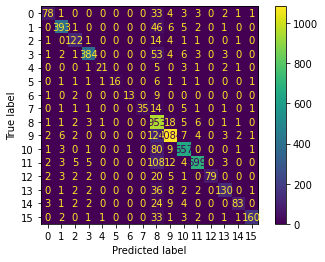

<Figure size 16000x16000 with 0 Axes>



CM for Decision Tree test set:


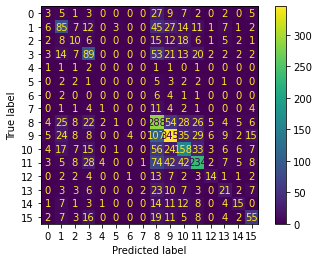

<Figure size 16000x16000 with 0 Axes>

In [ ]:
from pandas.core.groupby.groupby import final
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings("ignore")
#Use text vectorization to turn text into numerical representation
vec=TfidfVectorizer(max_features=5000,stop_words='english')
vec.fit(df.posts)
#Use 3-folds validation
kf = KFold(n_splits = 3, shuffle = True, random_state = 55)
count = 0
for train_index, test_index in kf.split(df):
    count = count+1
    print("----------------------------------------------------------- Training set",count," -------------------------------------------------------------------------")
    x_train, x_test = df.iloc[train_index, :], df.iloc[test_index, :]
    y_train, y_test = df.iloc[train_index], df.iloc[test_index]
  
    tx = x_train['posts']
    ty = y_train['type']
    testx = x_test['posts']
    testy = y_test['type']
   
    tx_trans = vec.transform(tx).toarray()
    testx_trans =vec.transform(testx).toarray()
    #encode 'type'
    target_encoder =LabelEncoder()
    ty_trans=target_encoder.fit_transform(ty)
    testy_trans=target_encoder.fit_transform(testy)
    
    #Use SVC to train model
    model_svc=SVC()
    model_svc.fit(tx_trans,ty_trans)
    
    print("SVC Training:")
    predict_y = model_svc.predict(tx_trans)
    predict_y_test = model_svc.predict(testx_trans)
    #print SVC result
    print('train set result \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))

    #show confusion matrix for train sets and test sets
    cm_svc = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
    print("CM for SVC train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_svc_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_test)
    print("CM for SVC test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    #Use Logistic Regression to train the model
    print("\nLogistic Regression Training:")
    logreg=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
    logreg.fit(tx_trans,ty_trans)

    predict_y = logreg.predict(tx_trans)
    predict_y_test = logreg.predict(testx_trans)
    #print results
    print('train classification report \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))
     #show confusion matrix for train sets and test sets
    cm_lr = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
    print("CM for Logistic Regression train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_lr_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_test)
    print("CM for Logistic Regression test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')


    #Use Decision Tree with a maximum depth of 16 to train the model
    print("\Decision Tree Training:")
    model_tree=DecisionTreeClassifier(max_depth=16)
    model_tree.fit(tx_trans,ty_trans)

    predict_y = model_tree.predict(tx_trans)
    predict_y_test = model_tree.predict(testx_trans)
    #print results
    print('train classification report \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))
     #show confusion matrix for train sets and test sets
    cm_tree = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
    print("CM for Decision Tree train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_tree_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree_test)
    print("CM for Decision Tree test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n') 